In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
# Import the dataset
df_train = pd.read_csv('/content/drive/My Drive/cleaned_data.csv')

In [139]:
X = df_train.drop(columns={'ID','default payment next month','EDUCATION_CAT'})
y = df_train['default payment next month']

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [141]:
X_train.shape, X_test.shape ,y_train.shape , X_test.shape

((21331, 27), (5333, 27), (21331,), (5333, 27))

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [142]:
# scale data before regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [143]:
# fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
# predictiing the test result
y_pred = classifier.predict(X_test)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [144]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [145]:
y_pred_prob= classifier.predict_proba(X_test)

In [146]:
y_pred_prob_2 = y_pred_prob[:,1]
y_pred_prob_2

array([0.09118821, 0.0285821 , 0.20023731, ..., 0.1468045 , 0.19906192,
       0.10827522])

classification_report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      4204
           1       0.74      0.26      0.39      1129

    accuracy                           0.82      5333
   macro avg       0.79      0.62      0.64      5333
weighted avg       0.81      0.82      0.79      5333

confusion matrix:
 [[4101  103]
 [ 832  297]]
accuracy_score: 0.8246765422838928


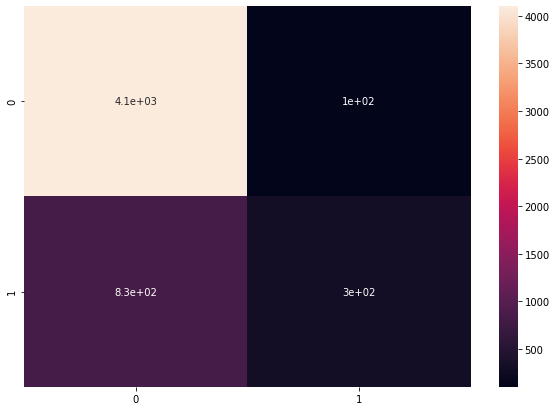

In [147]:
from sklearn.metrics import confusion_matrix ,classification_report, accuracy_score
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
print('classification_report:\n',classification_report(y_test,y_pred))
print('confusion matrix:\n',cm)
print('accuracy_score:',accuracy_score(y_test,y_pred))

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [148]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_pred_prob_2)

0.7226987204391786

_________________________________________________________________________
**Now, plot the ROC curve.**


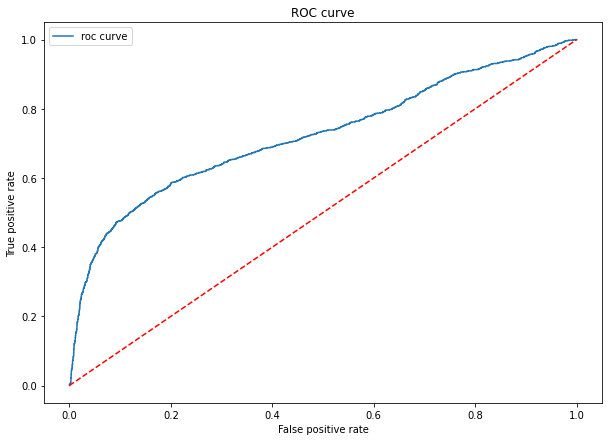

In [149]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test , y_pred_prob_2)
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label = 'roc curve')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [150]:
from sklearn.metrics import precision_recall_curve
precision_recall_curve(y_test , y_pred_prob_2)

(array([0.21229786, 0.21214971, 0.21218962, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99114260e-01, 9.99114260e-01, ...,
        1.77147919e-03, 8.85739593e-04, 0.00000000e+00]),
 array([0.01275115, 0.01285449, 0.01434246, ..., 0.95908544, 0.97639688,
        0.99325772]))

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


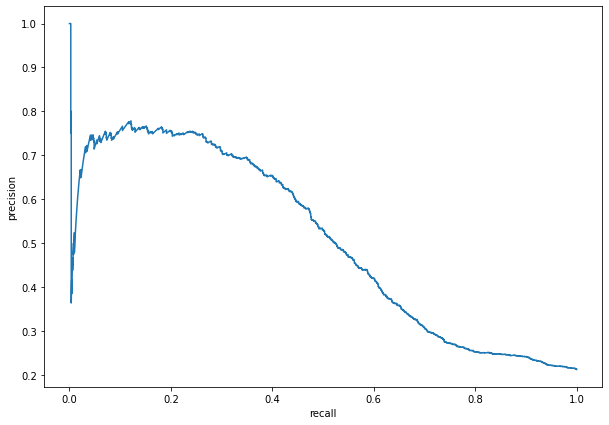

In [156]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision , recall ,threshold = precision_recall_curve(y_test , y_pred_prob_2)
plt.figure(figsize=(10,7))
plt.plot(recall ,precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [157]:
from sklearn.metrics import auc
print(auc(recall, precision))

0.5057615076030296


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [153]:
y_pred_prob_train = classifier.predict_proba(X_train)
print(roc_auc_score(y_train , y_pred_prob_train[:,1]))

0.7256619745136608


    How is this different, conceptually and quantitatively, from your earlier calculation?
